In [64]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 加载数据集
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 数据预处理
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


# 建立模型
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=128)

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# 保存模型
model.save('my_model.h5')

Epoch 1/3
375/375 [==============================] - 3s 9ms/step - loss: 0.5901 - accuracy: 0.7994 - val_loss: 0.4322 - val_accuracy: 0.8475
Epoch 2/3
375/375 [==============================] - 3s 9ms/step - loss: 0.3906 - accuracy: 0.8646 - val_loss: 0.3913 - val_accuracy: 0.8626
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.3671 - accuracy: 0.8693
Test loss: 0.3670709431171417
Test accuracy: 0.8693000078201294


/Users/zhiyuzhang/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 10ms/step


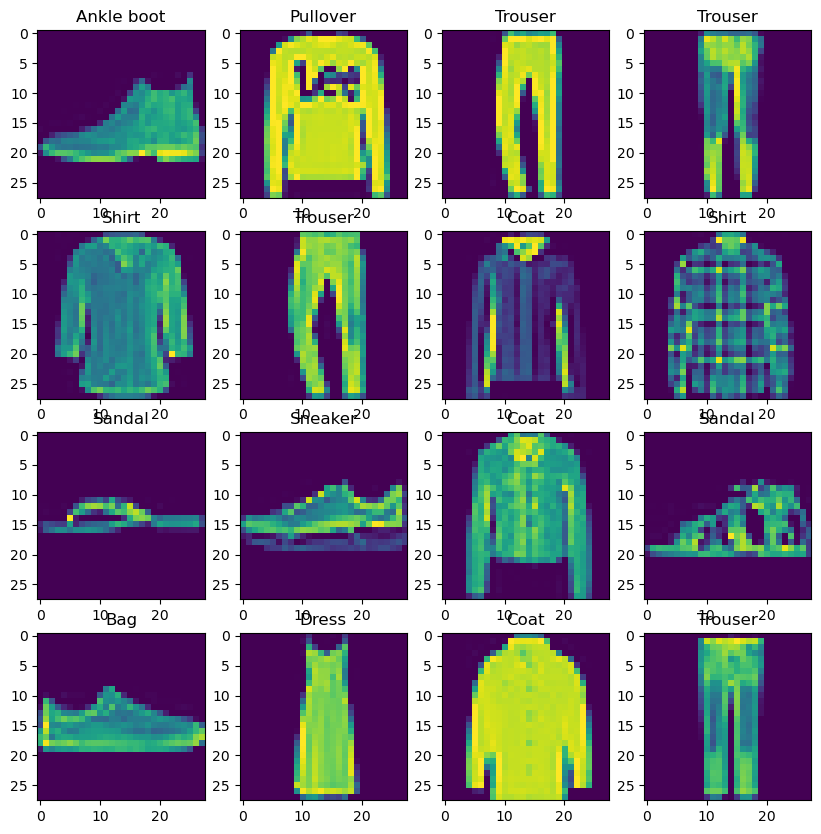

In [61]:
import tensorflow as tf
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

# 加载模型
model = tf.keras.models.load_model('my_model.h5')

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, ax = plt.subplots(4, 4, figsize=(10, 10))
ax = ax.flatten()
for i in range(16):
    img = X_test[i].reshape(1, 28, 28, 1)
    predictions = model.predict(img)
    class_index = np.argmax(predictions)
    class_name = class_names[class_index]
    ax[i].imshow(X_test[i].reshape(28, 28))
    ax[i].set_title(class_name)

In [62]:
#TODO: DAE model

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D

# 加载数据集
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 数据预处理
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)



inputs = Input(shape=(28, 28, 1))

conv1 = Conv2D(8, 3, padding='same')(inputs)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
relu1 = tf.keras.layers.ReLU()(pool1)

conv2 = Conv2D(16, 3, padding='same')(relu1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
relu2 = tf.keras.layers.ReLU()(pool2)

flat = tf.keras.layers.Flatten()(relu2)
linear1 = tf.keras.layers.Dense(128)(flat)
relu3 = tf.keras.layers.ReLU()(linear1)
linear2 = tf.keras.layers.Dense(10)(relu3)
outputs = tf.keras.layers.Softmax()(linear2)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# 训练模型
history = model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=128)

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/3
375/375 [==============================] - 4s 10ms/step - loss: 10.0145 - accuracy: 0.0924 - val_loss: 9.9090 - val_accuracy: 0.1276
Epoch 2/3
375/375 [==============================] - 3s 9ms/step - loss: 10.0138 - accuracy: 0.1057 - val_loss: 9.9090 - val_accuracy: 0.0999
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 9.9929 - accuracy: 0.0963
Test loss: 9.992863655090332
Test accuracy: 0.09629999846220016


1/1 [==============================] - 0s 10ms/step


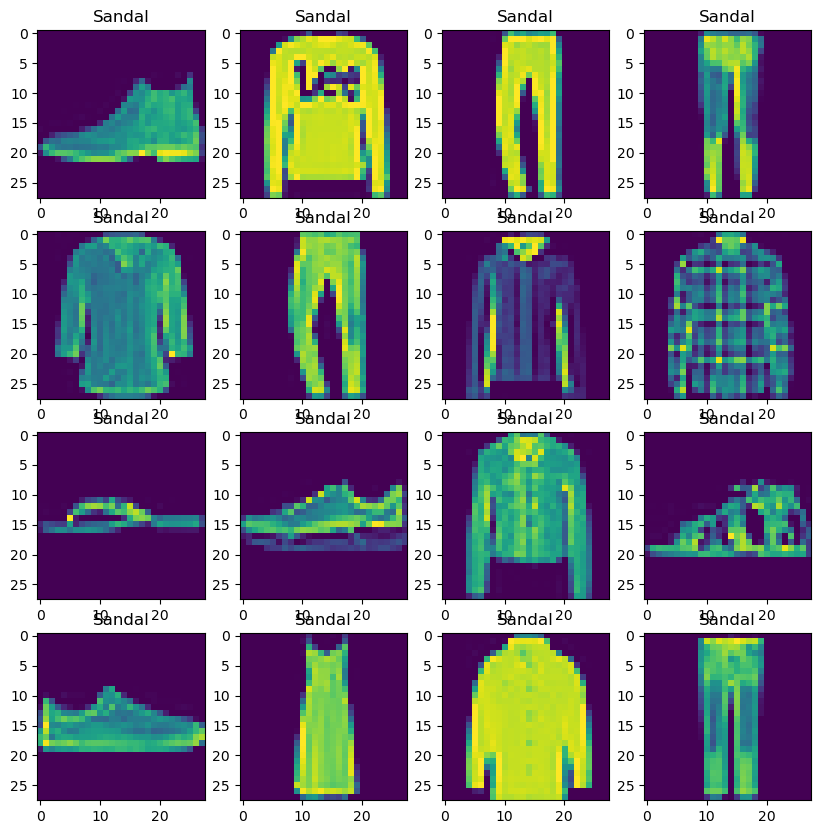

In [63]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, ax = plt.subplots(4, 4, figsize=(10, 10))
ax = ax.flatten()
for i in range(16):
    img = X_test[i].reshape(1, 28, 28, 1)
    predictions = model.predict(img)
    class_index = np.argmax(predictions)
    class_name = class_names[class_index]
    ax[i].imshow(X_test[i].reshape(28, 28))
    ax[i].set_title(class_name)